### We must think in terms of the original question we were trying to answer...
Can we accurately predict if a borrower will pay off their loan on time or not?
Error metric? Accuracy?
At the end of the day we are using this to try to make money and therefore we want to fund enough loans that are paid off on time in order to potentially offset losses from any loans that aren't paid off and ideally we would like to not have any loans go unpaid...
Essentially in this case we are concerning ourselves with false positives and false negatives:

Essentially we want to be the conservative investor in this case because we don't want to lose any money.
The false positive is the worst possible scenario for us in which we predict it will be paid back but in fact it wont be... and this will cause us to lose money. Then there is also the case of the false negative where you miss out on opportunity to make more money, however we would rather be okay with missing out on false negatives than funding the false positives.

In [1]:
#Imports and versions
import pandas as pd
import sklearn
import seaborn as sns

loans = pd.read_csv('loans_data_cleaned.csv')
print('Pandas Version:', pd.__version__)
print('Scikit Learn Version:', sklearn.__version__)
print('Seaborn Version:', sns.__version__)

Pandas Version: 0.25.1
Scikit Learn Version: 0.21.3
Seaborn Version: 0.9.0


In [2]:
#Again take a look at our data
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120098 entries, 0 to 120097
Data columns (total 94 columns):
loan_amnt                              120098 non-null int64
term                                   120098 non-null float64
int_rate                               120098 non-null float64
installment                            120098 non-null float64
emp_length                             120098 non-null int64
annual_inc                             120098 non-null float64
loan_status                            120098 non-null int64
dti                                    120098 non-null float64
delinq_2yrs                            120098 non-null float64
inq_last_6mths                         120098 non-null float64
mths_since_last_delinq                 120098 non-null float64
open_acc                               120098 non-null float64
pub_rec                                120098 non-null float64
revol_bal                              120098 non-null int64
revol_util     

In [3]:
#Take a look at our prediction value where we can see if we have some imbalanced data for classification
loans['loan_status'].value_counts()

1    92589
0    27509
Name: loan_status, dtype: int64

In [4]:
#First model I like to go with is logistic regression unless I am sure something else will be fast and easy to implement gives us a good base line to start with
#We use the balanced parameter in our logistic regression model to account for our slightly imbalanced data
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(class_weight='balanced')
train_cols = (loans.columns).drop('loan_status')
y = loans['loan_status']
X = loans[train_cols]

In [5]:
#Create training, validation, and testing sets... (and take a look at the shapes to ensure everything is the same)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [6]:
X_train.shape

(72058, 93)

In [7]:
X_val.shape

(24020, 93)

In [8]:
X_test.shape

(24020, 93)

In [9]:
y_train.shape

(72058,)

In [10]:
y_val.shape

(24020,)

In [11]:
y_test.shape

(24020,)

In [12]:
#Now we will go ahead and fit a simple logistic regression model
lr = lr.fit(X_train, y_train)
lr.coef_

/home/j/python3.7dev1/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([[-4.27730352e-05, -1.06231922e-02, -6.19337033e-02,
         4.40996264e-04,  1.64165699e-02,  8.25538789e-08,
        -1.85239392e-02, -1.94055300e-03, -6.06063614e-03,
         4.46679361e-03,  1.50145823e-03, -4.23039318e-03,
        -1.23856929e-06, -3.41636604e-03,  1.25935645e-02,
        -5.33189720e-04, -1.07106776e-04,  7.58073915e-06,
        -1.68410760e-06, -4.09261099e-03,  3.44040318e-03,
        -2.28881815e-03, -4.77819376e-03, -3.27554130e-04,
        -5.72497842e-06,  9.21443944e-04, -4.21827593e-03,
        -1.53023550e-02,  7.03124990e-06, -9.72451210e-04,
        -5.64870132e-07, -3.33174685e-03,  1.21036278e-02,
        -7.89999696e-03, -1.86893577e-02,  9.09672243e-06,
         1.14209607e-05,  4.27809438e-03, -3.33728016e-08,
        -5.73487422e-06,  1.08124730e-03,  6.69320979e-04,
         1.73374098e-04,  1.33163754e-03,  2.22113673e-02,
         1.26204941e-03,  1.08715558e-02,  1.70301702e-03,
         1.51105225e-02, -7.78963371e-03, -1.60196711e-0

In [13]:
lr.intercept_

array([0.00151295])

In [14]:
model_results = pd.Series(lr.predict(X_val))
model_results

0        1
1        1
2        1
3        0
4        0
        ..
24015    0
24016    0
24017    0
24018    1
24019    0
Length: 24020, dtype: int64

In [15]:
#Model predicts they will pay back the loan when in fact they do not = false positive:
fp_filter = ((model_results == 1) & (loans['loan_status'] == 0))
fp = len(model_results[fp_filter])

#Model predicts they wont pay back the loan when in fact they do = false negative:
fn_filter = ((model_results == 0) & (loans['loan_status'] == 1))
fn = len(model_results[fn_filter])

#True Positives
tp_filter = ((model_results == 1) & (loans['loan_status'] == 1))
tp = len(model_results[tp_filter])

tn_filter = ((model_results == 0) & (loans['loan_status'] == 0))
tn = len(model_results[tn_filter])

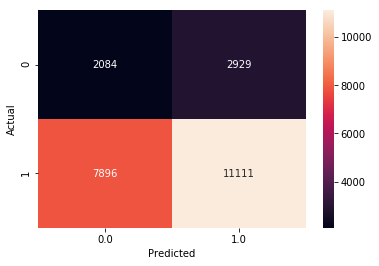

In [16]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
data = {'loans' : loans['loan_status'], 
        'model_results': model_results}

df = pd.DataFrame(data, columns=['loans', 'model_results'])
confusion_matrix = pd.crosstab(df['loans'], df['model_results'], rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrix, annot=True, fmt='g')

In [17]:
FPR = fp / (fp + tn)
print('FPR:', FPR)

TPR = tp / (tp + fn)
print('TPR:', TPR)

FPR: 0.5842808697386794
TPR: 0.5845741042773714


In [18]:
from sklearn.model_selection import cross_val_predict
model2_results = cross_val_predict(lr, X = X_train, y = y_train, cv=3)

/home/j/python3.7dev1/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/j/python3.7dev1/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/j/python3.7dev1/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [19]:
model2_results = pd.Series(model_results)
model2_results

0        1
1        1
2        1
3        0
4        0
        ..
24015    0
24016    0
24017    0
24018    1
24019    0
Length: 24020, dtype: int64

In [20]:
#Model predicts they will pay back the loan when in fact they do not = false positive:
fp_filter = ((model2_results == 1) & (loans['loan_status'] == 0))
fp = len(model2_results[fp_filter])

#Model predicts they wont pay back the loan when in fact they do = false negative:
fn_filter = ((model2_results == 0) & (loans['loan_status'] == 1))
fn = len(model2_results[fn_filter])

#True Positives
tp_filter = ((model2_results == 1) & (loans['loan_status'] == 1))
tp = len(model2_results[tp_filter])

tn_filter = ((model2_results == 0) & (loans['loan_status'] == 0))
tn = len(model2_results[tn_filter])

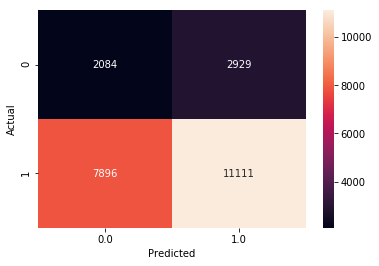

In [21]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
data = {'loans' : loans['loan_status'], 
        'model_results': model2_results}

df = pd.DataFrame(data, columns=['loans', 'model_results'])
confusion_matrix = pd.crosstab(df['loans'], df['model_results'], rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrix, annot=True, fmt='g')

In [22]:
FPR = fp / (fp + tn)
print('FPR:', FPR)

TPR = tp / (tp + fn)
print('TPR:', TPR)

FPR: 0.5842808697386794
TPR: 0.5845741042773714


#### As you can see the current model has a false positive rate of 58.4% which means this is the percentage of loans that shouldnt be funded that i would based on the current models and the TPR or true positive rate is 58.4 % which means we are only funding 58.4% of the loans we should be funding.

In [23]:
#We will now try creating a custom penalty for the class weight parameter
penalty = {
    0: 10,
    1: 1
}

lr = LogisticRegression(class_weight=penalty)
model3_results = cross_val_predict(lr, X = X_val, y = y_val, cv=3)
model3_results = pd.Series(model3_results)

/home/j/python3.7dev1/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/j/python3.7dev1/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/j/python3.7dev1/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/j/python3.7dev1/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/j/python3.7dev1/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of it

In [24]:
#Model predicts they will pay back the loan when in fact they do not = false positive:
fp_filter = ((model3_results == 1) & (loans['loan_status'] == 0))
fp = len(model3_results[fp_filter])

#Model predicts they wont pay back the loan when in fact they do = false negative:
fn_filter = ((model3_results == 0) & (loans['loan_status'] == 1))
fn = len(model3_results[fn_filter])

#True Positives
tp_filter = ((model3_results == 1) & (loans['loan_status'] == 1))
tp = len(model3_results[tp_filter])

tn_filter = ((model3_results == 0) & (loans['loan_status'] == 0))
tn = len(model3_results[tn_filter])

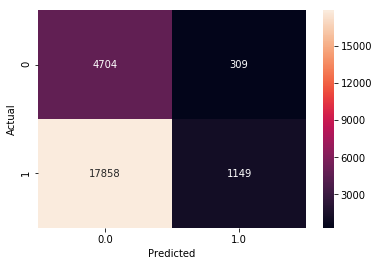

In [25]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
data = {'loans' : loans['loan_status'], 
        'model_results': model3_results}

df = pd.DataFrame(data, columns=['loans', 'model_results'])
confusion_matrix = pd.crosstab(df['loans'], df['model_results'], rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrix, annot=True, fmt='g')

In [26]:
FPR = fp / (fp + tn)
print('FPR:', FPR)

TPR = tp / (tp + fn)
print('TPR:', TPR)

FPR: 0.061639736684619986
TPR: 0.06045141263744936


Notice that the manual penalties method improves our false positive rate down to 6.1% however this comes at the expense of the true positive rate meaning that we don't fund as many loans as we should... While taking a look at the heatmap above for number of loans funded if we funded 1149 + 309 loans at a 10.65% interest rate and 309 of them were bad we would lose money so it is probably best to take a look at another model and see if we can improve these numbers...

The problem with our previous classifier the logistic regression is that no matter what we do it is going to be some linear approximation of the data so now we will try a RandomForest which are able to work with nonlinear data:

In [27]:
#Lets try to use a Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict

penalty = {
    0: 10,
    1: 7
}

rf = RandomForestClassifier(class_weight=penalty, random_state=42)
rf.fit(X_train, y_train)
model4_results = rf.predict(X_val)
model4_results = pd.Series(model4_results)
model4_results.shape

/home/j/python3.7dev1/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


(24020,)

In [28]:
#Model predicts they will pay back the loan when in fact they do not = false positive:
fp_filter = ((model4_results == 1) & (loans['loan_status'] == 0))
fp = len(model4_results[fp_filter])

#Model predicts they wont pay back the loan when in fact they do = false negative:
fn_filter = ((model4_results == 0) & (loans['loan_status'] == 1))
fn = len(model4_results[fn_filter])

#True Positives
tp_filter = ((model4_results == 1) & (loans['loan_status'] == 1))
tp = len(model4_results[tp_filter])

tn_filter = ((model4_results == 0) & (loans['loan_status'] == 0))
tn = len(model4_results[tn_filter])

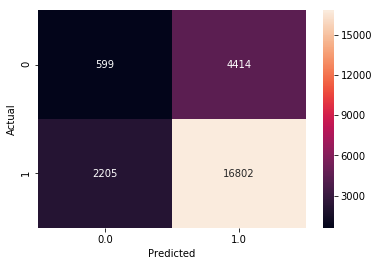

In [29]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
data = {'loans' : loans['loan_status'], 
        'model_results': model4_results}

df = pd.DataFrame(data, columns=['loans', 'model_results'])
confusion_matrix = pd.crosstab(df['loans'], df['model_results'], rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrix, annot=True, fmt='g')

In [30]:
FPR = fp / (fp + tn)
print('FPR:', FPR)

TPR = tp / (tp + fn)
print('TPR:', TPR)

#Ratio of TP to FP (We need this to be greater than 10 in order to guarantee a profit)
print('Ratio of TP to FP', tp/fp)

FPR: 0.8805106722521444
TPR: 0.8839901089072447
Ratio of TP to FP 3.8065246941549615


In [31]:
#Lets try another model
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [32]:
model5 = XGBClassifier()
model5.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [33]:
model5_results = model5.predict(X_val)
model5_results = pd.Series(model5_results)

In [34]:
#Model predicts they will pay back the loan when in fact they do not = false positive:
fp_filter = ((model5_results == 1) & (loans['loan_status'] == 0))
fp = len(model5_results[fp_filter])

#Model predicts they wont pay back the loan when in fact they do = false negative:
fn_filter = ((model5_results == 0) & (loans['loan_status'] == 1))
fn = len(model5_results[fn_filter])

#True Positives
tp_filter = ((model5_results == 1) & (loans['loan_status'] == 1))
tp = len(model5_results[tp_filter])

tn_filter = ((model5_results == 0) & (loans['loan_status'] == 0))
tn = len(model5_results[tn_filter])

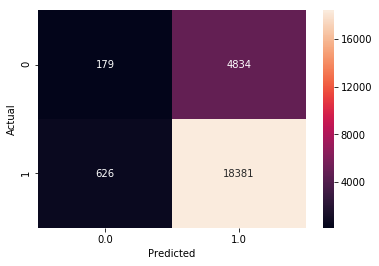

In [35]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
data = {'loans' : loans['loan_status'], 
        'model_results': model5_results}

df = pd.DataFrame(data, columns=['loans', 'model_results'])
confusion_matrix = pd.crosstab(df['loans'], df['model_results'], rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrix, annot=True, fmt='g')

In [36]:
FPR = fp / (fp + tn)
print('FPR:', FPR)

TPR = tp / (tp + fn)
print('TPR:', TPR)

#Ratio of TP to FP (We need this to be greater than 10 in order to guarantee a profit)
print('Ratio of TP to FP', tp/fp)

FPR: 0.964292838619589
TPR: 0.967064765612669
Ratio of TP to FP 3.8024410426148116


## Some next steps I would like to work on:
* We can tweak penalties further and try to implement a gridsearch optimization to find the best penalties
* potentially try some additional models and maybe even something custom or more advanced
* Generate better features with some of the discarded columns(such as maybe emp_title)
* use some ensembling techniques for multiple models to potentially increase our accuracy on predictions
* apply some hyperparameter tuning for more performance

In [37]:
#Our models are not performing very well on the data and a good idea is to go back and do some more feature engineering
print(model5.feature_importances_)

[0.02246257 0.03651883 0.16443129 0.02072138 0.0105546  0.01315493
 0.02113673 0.0170912  0.00735975 0.01326549 0.         0.00866215
 0.00740461 0.00928431 0.00962977 0.         0.         0.00818451
 0.00787758 0.01017324 0.00297191 0.00856954 0.         0.00538697
 0.         0.00641299 0.00592252 0.0156876  0.01596501 0.01476793
 0.01335922 0.00736349 0.00798388 0.01119786 0.01735159 0.01727621
 0.0201206  0.00870683 0.         0.00510318 0.00891741 0.01358033
 0.0063529  0.00622503 0.03122727 0.00641362 0.01148312 0.00873828
 0.00751879 0.00955402 0.01490046 0.         0.00702493 0.00411663
 0.01035157 0.00348156 0.01817746 0.         0.         0.
 0.         0.01032523 0.00565192 0.00963716 0.00674227 0.02407748
 0.00879976 0.02446785 0.00945404 0.         0.01661853 0.
 0.         0.03740418 0.04334504 0.         0.01569212 0.
 0.         0.         0.         0.         0.00823695 0.
 0.         0.00802008 0.         0.0116388  0.00537707 0.00705513
 0.         0.00733271 0.  